In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define data directories
train_dir = 'E:/pneumonia/train'
val_dir = 'E:/pneumonia/val'
test_dir = 'E:/pneumonia/test'


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128, 128),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\vedan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator,
                    callbacks=[early_stopping])

Epoch 1/30


C:\Users\vedan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 54s 395ms/step - accuracy: 0.7711 - loss: 0.5202 - val_accuracy: 0.9183 - val_loss: 0.2046
Epoch 2/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 59s 438ms/step - accuracy: 0.8863 - loss: 0.2536 - val_accuracy: 0.9260 - val_loss: 0.1922
Epoch 3/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 63s 470ms/step - accuracy: 0.9213 - loss: 0.2029 - val_accuracy: 0.9442 - val_loss: 0.1680
Epoch 4/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 65s 482ms/step - accuracy: 0.9258 - loss: 0.1839 - val_accuracy: 0.9538 - val_loss: 0.1669
Epoch 5/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 65s 484ms/step - accuracy: 0.9394 - loss: 0.1712 - val_accuracy: 0.9327 - val_loss: 0.2028
Epoch 6/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 66s 492ms/step - accuracy: 0.9211 - loss: 0.1809 - val_accuracy: 0.9538 - val_loss: 0.1614
Epoch 7/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 65s 484ms/step - accuracy: 0.9315 - loss: 0.1752 - val_accuracy: 0.9529 - val_loss: 0.1600
Epoch 8/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 65s 483ms/step - accuracy: 0.9441 - loss: 0.1478 - val

In [8]:
# saving the model
model.save('pneumonia_detection.h5')

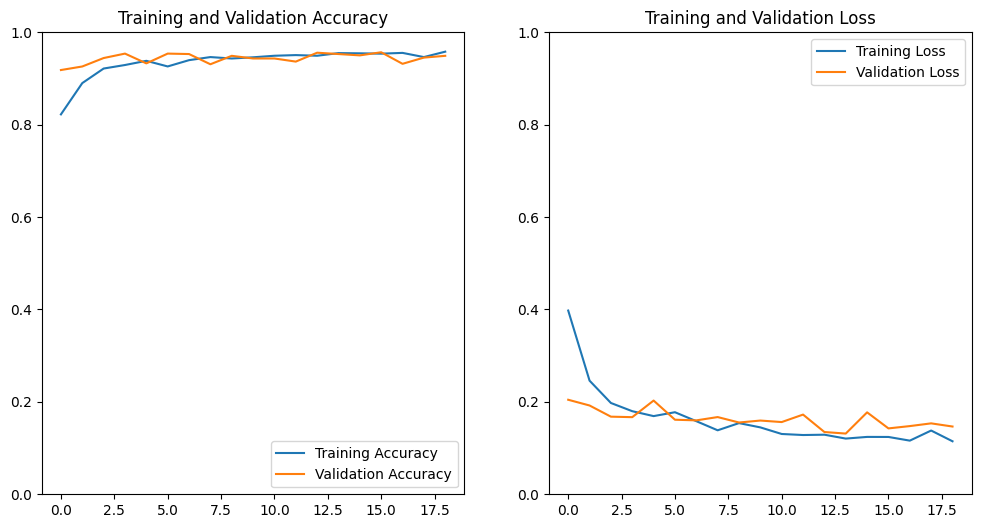

In [9]:
# Plot training & validation loss and accuracy
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.ylim(0,1)
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.ylim(0,1)
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training(history)

In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest Accuracy: {test_acc:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.8454 - loss: 0.4870

Test Accuracy: 0.8974


In [11]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Confusion Matrix and Classification Report
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

print('Confusion Matrix:')
print(cm)

print('\nClassification Report:')
print(cr)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step
Confusion Matrix:
[[175  59]
 [  5 385]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.75      0.85       234
   PNEUMONIA       0.87      0.99      0.92       390

    accuracy                           0.90       624
   macro avg       0.92      0.87      0.88       624
weighted avg       0.91      0.90      0.89       624



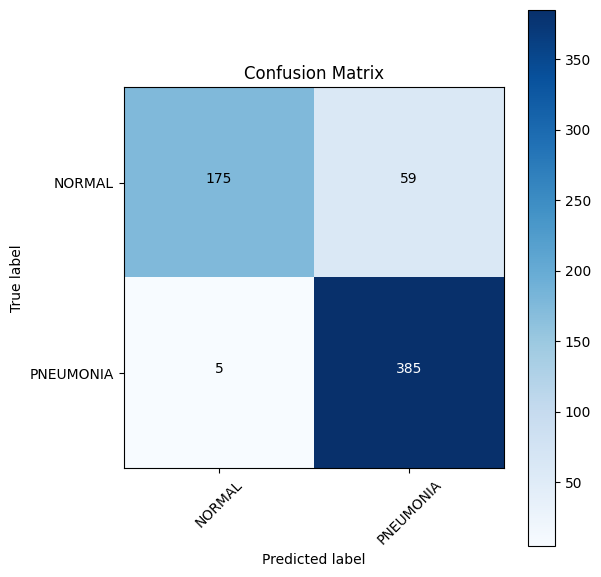

In [12]:
# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, test_generator.class_indices.keys())
plt.show()